In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from konlpy.tag import *
import re
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import os

In [37]:
short_df = pd.read_excel('한국어_단발성_대화_데이터셋.xlsx')
short_df

,Sentence,Emotion
0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,그냥 내 느낌일뿐겠지?,공포
2,아직너무초기라서 그런거죠?,공포
3,유치원버스 사고 낫다던데,공포
4,근데 원래이런거맞나요,공포
...,...,...
38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
38590,재미가 없으니 망하지,혐오
38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [42]:
short_df = short_df[short_df['Emotion'] != '놀람']
short_df = short_df.reset_index()
short_df

,index,Sentence,Emotion
0,0,언니 동생으로 부르는게 맞는 일인가요..??,공포
1,1,그냥 내 느낌일뿐겠지?,공포
2,2,아직너무초기라서 그런거죠?,공포
3,3,유치원버스 사고 낫다던데,공포
4,4,근데 원래이런거맞나요,공포
...,...,...,...
32691,38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오
32692,38590,재미가 없으니 망하지,혐오
32693,38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오
32694,38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오


In [43]:
short_df['Emotion'].value_counts()

행복    6037
분노    5665
공포    5468
혐오    5429
슬픔    5267
중립    4830
Name: Emotion, dtype: int64

In [44]:
encoder = LabelEncoder()
short_df['Emotion_'] = encoder.fit_transform(short_df['Emotion'].values)
short_df

,index,Sentence,Emotion,Emotion_
0,0,언니 동생으로 부르는게 맞는 일인가요..??,공포,0
1,1,그냥 내 느낌일뿐겠지?,공포,0
2,2,아직너무초기라서 그런거죠?,공포,0
3,3,유치원버스 사고 낫다던데,공포,0
4,4,근데 원래이런거맞나요,공포,0
...,...,...,...,...
32691,38589,솔직히 예보 제대로 못하는 데 세금이라도 아끼게 그냥 폐지해라..,혐오,5
32692,38590,재미가 없으니 망하지,혐오,5
32693,38591,공장 도시락 비우생적임 아르바이트했는데 화장실가성 손도 않씯고 재료 담고 바닥 떨어...,혐오,5
32694,38592,코딱지 만한 나라에서 지들끼리 피터지게 싸우는 센징 클래스 ㅉㅉㅉ,혐오,5


In [45]:
ohe = OneHotEncoder(sparse=False)
result = short_df['Emotion']

In [46]:
result.shape

(32696,)

In [47]:
result.values.reshape(-1, 1).shape

(32696, 1)

In [48]:
ohe.fit(result.values.reshape(-1, 1))

OneHotEncoder(sparse=False)

In [49]:
one_hot_encoded = ohe.transform(result.values.reshape(-1, 1))
one_hot_encoded

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [50]:
train_Y = one_hot_encoded
train_Y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [51]:
sentences = list(short_df['Sentence'].values)
sentences

['언니 동생으로 부르는게 맞는 일인가요..??',
 '그냥 내 느낌일뿐겠지?',
 '아직너무초기라서 그런거죠?',
 '유치원버스 사고 낫다던데',
 '근데 원래이런거맞나요',
 ' 남자친구가 떠날까봐요',
 '이거 했는데 허리가 아플수도 있나요? ;;',
 '내가불안해서꾸는걸까..',
 ' 일주일도 안 남았당...ㅠㅠ',
 '약은 최대한 안먹으려고 하는데좋은 음시있나요?0',
 ' 구직활동 하면서 남는시간은 뭘로 활용해야 되지..',
 '괜찮은분 같아서 괜히 조급해지네요 ㅜ',
 ' 제가 스타일을 바꾸면 더 어색하게만 변할것같아서 ㅠ0',
 '아내 있으면 여자 있는 술집가면 법 적으로 문제있나요?',
 ' 한소리들을지.... 도와주세요',
 '도와주실분 없나요..',
 '그냥 잡다한거말고학업에 관련된거 듣는게 더 좋은가요?',
 ' 가격은 반값....이거 질이 다른건가요??',
 '마지막에 말씀 드렸던대로 글은 이제 내릴게요의도치않게 실시간베스트글에 올라가서 남친이 볼거 같아서요 ㅠㅠ',
 '화장품회사다보니, 젊은 여자들이 많은거 같은데 걱정이네요..',
 ' 몸무게 1키로찌는건 아니겠죠?',
 'o자 다리 많이 심한가요?',
 ' 안하는게 나을까요??',
 '그정도로 더러운가요.........',
 ' 보통 가진통도 이렇게 오래가나요?',
 '여자가 술취해서 먼저 전화하는거 짜증나요???',
 '걱정이 큽니다',
 '이거 무슨 증상이죠??ㅜㅜ',
 ' 다름 아니라 제동생 걱정 입니다',
 '아무래도 무리겠죠?',
 '애인으로써 정말 걱정됩니다',
 '이러다 일주일전에 나오는거 아닌가몰라요',
 '경고먹을까 고민0',
 '극도로 예민하고 불안한 상태에요',
 ' 못받으면 어떡하죠',
 ' 안검하수도어울릴까요?',
 '근데 그게 사마귀 일수 있데요.',
 '이제 곧 내년이면 22살인 여대생입니다...요즘 고민이 있는데요...',
 ' 안하는게 좋은가요?',
 '자제할수있는 방법 뭐 없을까요??',
 '집에와서 또 운동하긴했는데지난 3주의 노력이 물거품이 될까봐

In [52]:
sentences = [re.sub(r'[^가-힣A-Za-z0-9]', ' ', sentence) for sentence in sentences]
sentences = [re.sub(r'\s+', ' ', sentence) for sentence in sentences]
sentences

['언니 동생으로 부르는게 맞는 일인가요 ',
 '그냥 내 느낌일뿐겠지 ',
 '아직너무초기라서 그런거죠 ',
 '유치원버스 사고 낫다던데',
 '근데 원래이런거맞나요',
 ' 남자친구가 떠날까봐요',
 '이거 했는데 허리가 아플수도 있나요 ',
 '내가불안해서꾸는걸까 ',
 ' 일주일도 안 남았당 ',
 '약은 최대한 안먹으려고 하는데좋은 음시있나요 0',
 ' 구직활동 하면서 남는시간은 뭘로 활용해야 되지 ',
 '괜찮은분 같아서 괜히 조급해지네요 ',
 ' 제가 스타일을 바꾸면 더 어색하게만 변할것같아서 0',
 '아내 있으면 여자 있는 술집가면 법 적으로 문제있나요 ',
 ' 한소리들을지 도와주세요',
 '도와주실분 없나요 ',
 '그냥 잡다한거말고학업에 관련된거 듣는게 더 좋은가요 ',
 ' 가격은 반값 이거 질이 다른건가요 ',
 '마지막에 말씀 드렸던대로 글은 이제 내릴게요의도치않게 실시간베스트글에 올라가서 남친이 볼거 같아서요 ',
 '화장품회사다보니 젊은 여자들이 많은거 같은데 걱정이네요 ',
 ' 몸무게 1키로찌는건 아니겠죠 ',
 'o자 다리 많이 심한가요 ',
 ' 안하는게 나을까요 ',
 '그정도로 더러운가요 ',
 ' 보통 가진통도 이렇게 오래가나요 ',
 '여자가 술취해서 먼저 전화하는거 짜증나요 ',
 '걱정이 큽니다',
 '이거 무슨 증상이죠 ',
 ' 다름 아니라 제동생 걱정 입니다',
 '아무래도 무리겠죠 ',
 '애인으로써 정말 걱정됩니다',
 '이러다 일주일전에 나오는거 아닌가몰라요',
 '경고먹을까 고민0',
 '극도로 예민하고 불안한 상태에요',
 ' 못받으면 어떡하죠',
 ' 안검하수도어울릴까요 ',
 '근데 그게 사마귀 일수 있데요 ',
 '이제 곧 내년이면 22살인 여대생입니다 요즘 고민이 있는데요 ',
 ' 안하는게 좋은가요 ',
 '자제할수있는 방법 뭐 없을까요 ',
 '집에와서 또 운동하긴했는데지난 3주의 노력이 물거품이 될까봐정말 걱정되요',
 '옳은 선택인지 모르겠음',
 '8월이면 둘째가 태어나서 마음이

In [53]:
# han = Hannanum()
okt = Okt()
# sentences = [han.morphs(sentence) for sentence in sentences]
sentences = [okt.morphs(sentence) for sentence in sentences]
sentences

[['언니', '동생', '으로', '부르는게', '맞는', '일', '인가요'],
 ['그냥', '내', '느낌', '일', '뿐', '겠지'],
 ['아직', '너무', '초기', '라서', '그런', '거', '죠'],
 ['유치원', '버스', '사고', '낫다던데'],
 ['근데', '원래', '이런거', '맞나요'],
 ['남자친구', '가', '떠날까봐', '요'],
 ['이', '거', '했는데', '허리', '가', '아플수도', '있나요'],
 ['내', '가', '불안해서', '꾸는걸', '까'],
 ['일주일', '도', '안', '남았당'],
 ['약', '은', '최대한', '안', '먹으려고', '하는데', '좋은', '음시', '있나요', '0'],
 ['구직', '활동', '하면서', '남는', '시간', '은', '뭘', '로', '활용', '해야', '되지'],
 ['괜찮은', '분', '같아서', '괜히', '조급해지네요'],
 ['제', '가', '스타일', '을', '바꾸면', '더', '어색하게만', '변할것', '같아서', '0'],
 ['아내', '있으면', '여자', '있는', '술집', '가면', '법', '적', '으로', '문제', '있나요'],
 ['한소리', '들을지', '도와주세요'],
 ['도와주실', '분', '없나요'],
 ['그냥', '잡다한거말고', '학업', '에', '관련', '된거', '듣는게', '더', '좋은가요'],
 ['가격', '은', '반값', '이', '거', '질', '이', '다른', '건가', '요'],
 ['마지막',
  '에',
  '말씀',
  '드렸던대로',
  '글',
  '은',
  '이제',
  '내릴게요',
  '의도',
  '치',
  '않게',
  '실시간',
  '베스트',
  '글',
  '에',
  '올라가서',
  '남친',
  '이',
  '볼거',
  '같아서요'],
 ['화장품', '회사', '다', '보니', '젊은', '여자', '들', 

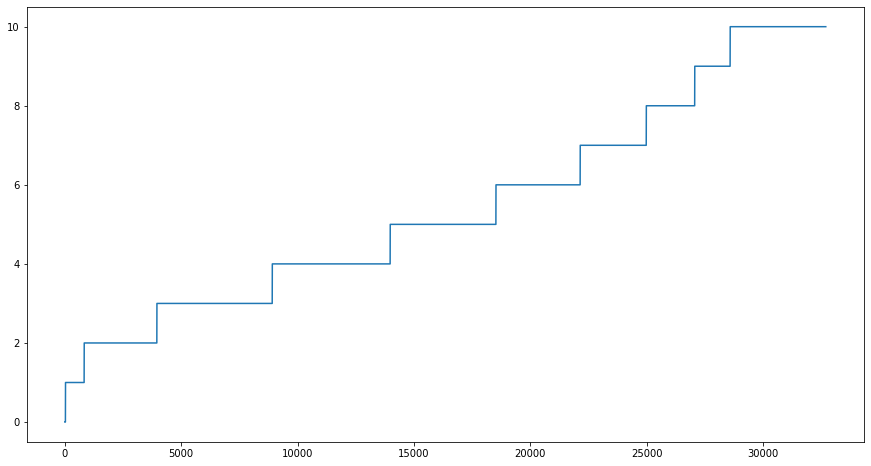

32696


In [71]:
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.figure(figsize=(15,8))
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=10) for l in sentence_len]))

In [72]:
sentences_new = []
for sentence in sentences:
    sentences_new.append([word for word in sentence][:8])
sentences = sentences_new

In [73]:
tokenizer = Tokenizer(num_words=30000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

train_X[:5]

array([[  444,   752,     1,  5523,  1293,   269,     0,     0],
       [   13,   279,  1374,     0,     0,     0,     0,     0],
       [   99,     2,  3005,   496,   128,     0,     0,     0],
       [ 2435,  1111,   238, 14452,     0,     0,     0,     0],
       [   30,   270,   622,  1892,     0,     0,     0,     0]],
      dtype=int32)

In [89]:
def create_model():
    model = keras.Sequential()
    model.add(layers.Embedding(30000, 500, input_length=8))
    model.add(layers.Bidirectional(layers.LSTM(100, activation='relu')))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(20))
    model.add(layers.Dense(6, activation='softmax'))
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                 metrics=['accuracy'])
    return model

model = create_model()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 8, 500)            15000000  
_________________________________________________________________
bidirectional_6 (Bidirection (None, 200)               480800    
_________________________________________________________________
dense_13 (Dense)             (None, 50)                10050     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_15 (Dense)             (None, 6)                 126       
Total params: 15,491,996
Trainable params: 15,491,996
Non-trainable params: 0
__________________________________________

In [18]:
# checkpoint_path = "training_1/cp-{epoch:04d}.ckpt"
# checkpoint_dir = os.path.dirname(checkpoint_path)
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
#                                                 save_weights_only=True,
#                                                 verbose=1, period=1)

In [90]:
# model.save_weights(checkpoint_path.format(epoch=0))
history = model.fit(train_X, train_Y, shuffle=True ,epochs=4, batch_size=100, 
                   validation_data=(train_X, train_Y)
                   # validation_split=0.2
                   )

Epoch 1/4
327/327 [==============================] - 70s 209ms/step - loss: 1.4666 - accuracy: 0.3837 - val_loss: 1.0124 - val_accuracy: 0.6425
Epoch 2/4
327/327 [==============================] - 67s 205ms/step - loss: 0.9769 - accuracy: 0.6241 - val_loss: 0.5400 - val_accuracy: 0.8487
Epoch 3/4
327/327 [==============================] - 67s 206ms/step - loss: 0.5316 - accuracy: 0.8130 - val_loss: 0.2738 - val_accuracy: 0.9234
Epoch 4/4
327/327 [==============================] - 68s 207ms/step - loss: 0.2995 - accuracy: 0.8958 - val_loss: 0.1501 - val_accuracy: 0.9522


In [91]:
model.save('ruo_chatbot_model.h5')
# new_model = keras.models.load_model('ruo_chatbot_model.h5')
# new_model.summary()

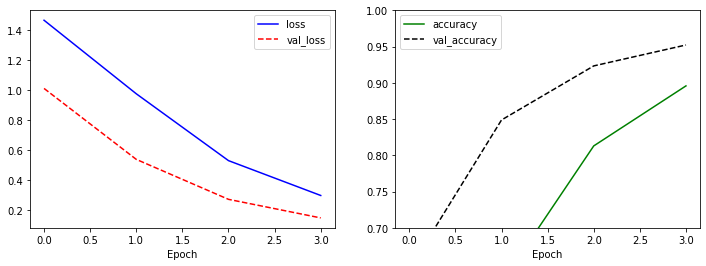

In [92]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [93]:
model.evaluate(train_X[-2000:], train_Y[-2000:])

63/63 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9250


[0.24704410135746002, 0.925000011920929]

In [94]:
result_emotion = {0:"공포", 1:"분노", 2:"슬픔", 3:"중립", 
                 4:"행복", 5:"혐오"}

In [112]:
test_sentence = input("하고싶은 말을 하세요: ")
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=20)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])
    result = prediction[idx]
    res_ind = np.argmax(result)
print("감정분석 결과: ", result_emotion[res_ind])

하고싶은 말을 하세요: 뒤질래
['뒤질래']
[0.07325866 0.12173004 0.03377794 0.03989705 0.46712112 0.2642152 ]
감정분석 결과:  행복


In [ ]:
난 너가 좋아 : 행복
진짜 싫다 : 혐오
더러워 : 혐오
역겨워 : 분노
아침 일찍 일어났네 : 행복
깜짝이야 : 행복
슬퍼요 : 슬픔
기분 좋네 : 행복
요즘 세상이 너무 흉흉해 : 행복
마지막 경고다 : 놀람